In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from ekdist import ekrecord
from ekdist import ekplot
from ekdist import eklib

In [3]:
rec = ekrecord.SingleChannelRecord()
infile = "../ekdist/tests/181003S8.SCN"
#infile = "../ekdist/tests/AChsim.scn"
rec.load_SCN_file(infile)
print(rec)

Intervals loaded from SCN file: ../ekdist/tests/181003S8.SCN
Total number of intervals = 10610
Resolution for HJC calculations = 0.0 microseconds
Number of resolved intervals = 10609
Number of time periods = 9459

Number of open periods = 4730
Mean and SD of open periods = 0.595444014 +/- 0.698772782 ms
Range of open periods from 0.008928712 ms to 9.549509865 ms

Number of shut intervals = 4729
Mean and SD of shut periods = 139.874249697 +/- 464.593946934 ms
Range of shut periods from 0.001000000 ms to 5753.057956696 ms


In [4]:
rec.tres = 30e-6
print(rec)

Intervals loaded from SCN file: ../ekdist/tests/181003S8.SCN
Total number of intervals = 10610
Resolution for HJC calculations = 30.0 microseconds
Number of resolved intervals = 9072
Number of time periods = 6995

Number of open periods = 3498
Mean and SD of open periods = 0.810135248 +/- 1.038887086 ms
Range of open periods from 0.030263431 ms to 14.093250909 ms

Number of shut intervals = 3497
Mean and SD of shut periods = 189.147233963 +/- 531.719386578 ms
Range of shut periods from 0.030003665 ms to 5753.057956696 ms


### Amplitudes

Average open amplitude =  -5.314578285583337


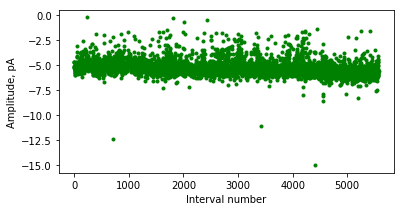

In [5]:
fc = 3000 # 3 kHz
fig = ekplot.stability_amplitudes(rec, window=1)
#plt.savefig('stability_amplitudes.png')

Range of amplitudes: 0.258 - 7.124


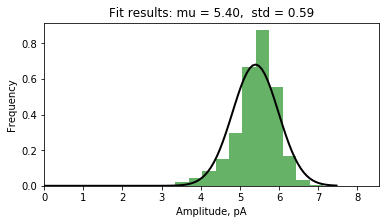

In [6]:
fig = ekplot.histogram_fitted_amplitudes(rec, fc, n=2, gauss=True)
#plt.savefig('histogram_fitted_amplitudes.png')

### Stability plots: open periods, shut periods, Popen

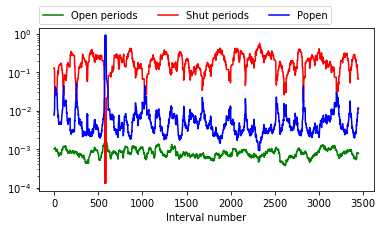

In [7]:
fig = ekplot.stability_intervals(rec, window=50)
#plt.savefig('stability_open_shut_Popen.png')

### Open periods

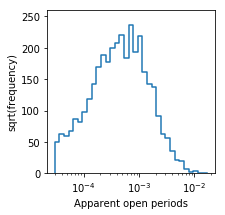

In [8]:
fig = ekplot.histogram_xlog_ysqrt_data(rec.opint, rec.tres, xlabel='Apparent open periods')

In [9]:
tau1, area1 = [0.2e-3, 2e-3], [0.20]
result1 = eklib.fit_exponentials(tau1, area1, rec.opint)
eklib.print_exps(result1.x, rec.opint)

Start LogLikelihood = -21059.604910212132
Optimization terminated successfully.
Final LogLikelihood = -21663.418295

Tau = 0.000412; lambda (1/s)= 2428.045225
Area= 0.612984; predicted number of intervals = 2262.112;amplitude (1/s) = 1488.352
Tau = 0.001334; lambda (1/s)= 749.488515
Area= 0.387016; predicted number of intervals = 1428.218;amplitude (1/s) = 290.064

Overall mean = 0.000769
Predicted true number of events =  3690.32923644953
Number of fitted =  3498
Predicted number below Ylow = 192.292; predicted number above Yhigh = 0.037


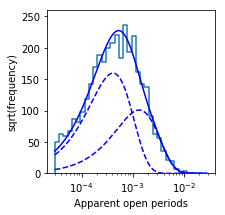

In [10]:
fig = ekplot.histogram_xlog_ysqrt_data(rec.opint, rec.tres, fitpars=result1.x, xlabel='Apparent open periods')

### Shut periods

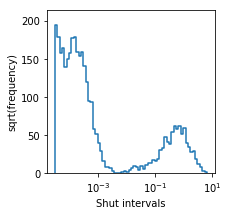

In [11]:
fig = ekplot.histogram_xlog_ysqrt_data(rec.shint, rec.tres, xlabel='Shut intervals')

In [12]:
tau2, area2 = [15e-6, 50e-6, 500e-6, 0.2], [0.2, 0.2, 0.2]
result2 = eklib.fit_exponentials(tau2, area2, rec.shint)
eklib.print_exps(result2.x, rec.shint)

Start LogLikelihood = -15135.84534470563
Optimization terminated successfully.
Final LogLikelihood = -17172.310270

Tau = 0.000003; lambda (1/s)= 369486.098984
Area= 0.307945; predicted number of intervals = 1977.036;amplitude (1/s) = 113781.402
Tau = 0.000052; lambda (1/s)= 19280.798135
Area= 0.278142; predicted number of intervals = 1785.698;amplitude (1/s) = 5362.800
Tau = 0.000317; lambda (1/s)= 3153.284219
Area= 0.278167; predicted number of intervals = 1785.859;amplitude (1/s) = 877.140
Tau = 0.761773; lambda (1/s)= 1.312727
Area= 0.135746; predicted number of intervals = 871.501;amplitude (1/s) = 0.178

Overall mean = 0.103511
Predicted true number of events =  6420.093219676357
Number of fitted =  3497
Predicted number below Ylow = 2922.636; predicted number above Yhigh = 0.457


In [ ]:
fig = ekplot.histogram_xlog_ysqrt_data(rec.shint, rec.tres, fitpars=result2.x, xlabel='Shut intervals')